# Generating Simple Audio Signals

[back to main page](index.ipynb)

We create a simple sine wave as an introductory example using Python and NumPy.

Let's start with some basic Python. We create three numbers and give each of them a name.

> Sometimes these are called *variables*, but that is actually misleading.
> Think about objects and names. An object is created (in our case a number) and we specify a name by which we want to access this object.

In [1]:
dur = 1.5  # duration in seconds
freq = 440.  # frequency in Hertz
fs = 44100  # sampling frequency in Hertz

Everything following a `#` sign is a comment.

There is no output. If you want to see which object a certain name refers to, just type the name:

In [2]:
dur

1.5

In Python, *everything* is an object. And every object has a *type*. Let's see ...

In [3]:
type(dur), type(freq), type(fs)

(float, float, int)

Note that we didn't specify any types explicitly, we just got Python's default types. Numbers with a comma are by default of type `float`, values without comma are of type `int`.

There are many more types in Python (strings, tuples, lists, dictionaries, ...), but let's ignore them for now.

If you want an overview about all the objects you have defined up to now, use `%who` or its more verbose cousin `%whos`.

In [4]:
%whos

Variable   Type     Data/Info
-----------------------------
dur        float    1.5
freq       float    440.0
fs         int      44100


Now, let's bring NumPy into the game. The canonical way to do that in a Python script is

In [5]:
import numpy as np

With this, we'll have to prepend "`np.`" to all NumPy functions, types etc.

Now let's create the most basic signal, a sine. This is kind of the "Hello World!" of signals.

In order to create a sine tone, we need first a series of time instances to represent our sampling times. The distance between those instances is the *sampling interval* $\tau = \frac{1}{f_s}$, where $f_s$ is the *sampling frequency*.

To create a series of regularly ascending (or descending) values, NumPy provides the function `arange()`. Let's use that.

In [6]:
t = np.arange(0, np.ceil(dur * fs)) / fs
t

array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
         1.49993197e+00,   1.49995465e+00,   1.49997732e+00])

As you can see, this creates an array of numbers from 0 to just below the value specified in `dur`. These are a lot of numbers, so to avoid flooding us with heaps of useless output, IPython just shows the first and last few values. Very handy.

> Note that in Python 2 and before, the division operator works a little differently then in Python 3. Here we assume we're using the latter, where the division of two `int`s returns a `float` value (and not an `int` with the truncated result!).
> To make sure this also works as expected in Python 2, you can convert one operand to `float` before the division or use a special `import` statement:
>
> ```python
> 1. / fs
> ```
>
> or
>
> ```python
> 1 / float(fs)
> ```
>
> or
>
> ```python
> from __future__ import division
> 1 / fs
> ```

Let's check the type of `t`.

In [7]:
type(t)

numpy.ndarray

The `ndarray` is the single most important type of NumPy. It can handle arrays with an arbitrary number of dimensions. All values stored in an `ndarray` have the same data type. This makes most operations on them faster then on Python's built-in `list`s.

Let's get some information about our brand new array named `t`.

In [8]:
t.dtype, t.size, t.ndim

(dtype('float64'), 66150, 1)

By default, NumPy stores floating point numbers as `float64`, i.e. each number using 64 bits. This is sometimes called _double precision_. If you want _single precision_, you can use `float32`. The length of our array is stored in `t.size` and `t.ndim` shows how many dimensions the array has. This one has only one. Boring.

Now that we have our time instances, we can compute the sine for each of them, according to the equation $x(t) = \sin(\omega t)$ with $\omega = 2\pi f$ and $f$ being the desired frequency of the resulting sine tone.

In [9]:
sig = np.sin(2 * np.pi * freq * t)
sig

array([ 0.        ,  0.06264832,  0.12505052, ..., -0.18696144,
       -0.12505052, -0.06264832])

Note that we didn't have to explicitly loop over all array elements. Most NumPy functions - including `sin()` - work element-wise. If an array is multiplied by a scalar, the multiplication is also applied element-wise.

> This is called "broadcasting", but more about that another time ...

To check if this actually worked, we plot the signal, but first we'll set up inline plotting.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

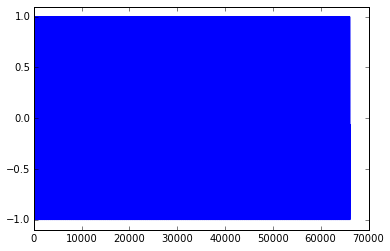

In [12]:
plt.plot(sig)
plt.ylim(-1.1, 1.1);

Hmmm ... maybe we recognize something if we only plot the first 200 values.

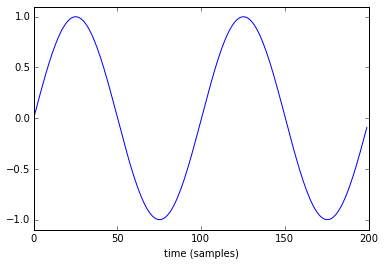

In [13]:
plt.plot(sig[:200])
plt.xlabel("time (samples)")
plt.ylim(-1.1, 1.1);

Better.

If we want to show the time in milliseconds instead of samples, we have to specify the time instances:

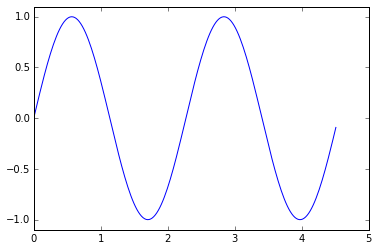

In [14]:
plt.plot(t[:200] * 1000, sig[:200])
plt.ylim(-1.1, 1.1);

To avoid specifying the same range twice, we can use a `slice` object.

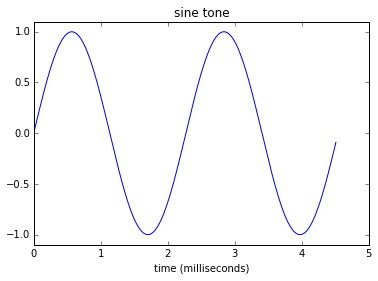

In [15]:
sl = slice(200)
plt.plot(t[sl] * 1000, sig[sl])
plt.title("sine tone")
plt.xlabel("time (milliseconds)")
plt.ylim(-1.1, 1.1);

In [16]:
# TODO: savefig("sinetone.pgf")

In [17]:
# TODO: save WAV file

In [18]:
# TODO: stereo signal, row vs. column

In [19]:
freq = np.array((500, 600))

sig = np.sin(2 * np.pi * freq * t.reshape(-1, 1))

sig

array([[ 0.        ,  0.        ],
       [ 0.07117769,  0.08538143],
       [ 0.14199432,  0.1701393 ],
       ..., 
       [-0.21209065, -0.25365458],
       [-0.14199432, -0.1701393 ],
       [-0.07117769, -0.08538143]])

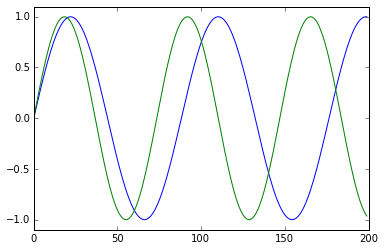

In [20]:
plt.plot(sig[:200])
plt.ylim(-1.1, 1.1);

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span resource="[_:publisher]" rel="dct:publisher">
    <span property="dct:title">Matthias Geier</span></span>
  has waived all copyright and related or neighboring rights to
  this work.
</p>